In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
from statsmodels.graphics import tsaplots

In [40]:
mu = np.array([-3, 0, 3])
s2 = np.array([[0.8, 0.8, 0.8],[0.2, 0.2, 0.2]])
# delta = np.array([1/3, 1/3, 1/3])
delta = np.array([0.45, 0.3, 0.25])
size = 10000
x = np.linspace(-6, 6, 100)
true_density = np.zeros((2, len(x)))
for i in range(2):
    true_density[i] = delta[0]*norm.pdf(x, mu[0], np.sqrt(s2[i,0])) + delta[1]*norm.pdf(x, mu[1], np.sqrt(s2[i,1])) + delta[2]*norm.pdf(x, mu[2], np.sqrt(s2[i,2])) 

In [41]:
def density(x, w, mu, s2):
    return w*norm.pdf(x, mu, np.sqrt(s2))

In [42]:
def MC(w, mu, s2, size):
    d = np.random.choice(a=[0,1,2], size=size, replace=True, p=w)
    theta = norm.rvs(mu[d], np.sqrt(s2[d]), size=size)
    return theta

In [43]:
def MCMC(w, mu, s2, size):
    theta = np.zeros(size+1)
    for s in range(1, size+1):
        theta_old = theta[s-1]
        prob=np.zeros(3)
        for i in range(3):
            prob[i] = density(theta_old, w[i], mu[i], s2[i])
        prob = prob/np.sum(prob)
        d = np.random.choice(a=[0,1,2], size=1, replace=True, p=prob)
        theta[s] = norm.rvs(mu[d], np.sqrt(s2[d]), size=1)
    return theta[1:]

In [44]:
t_MC = np.zeros((2, size))
t_MCMC = np.zeros((2, size))
for i in range(2):
    t_MC[i] = MC(delta, mu, s2[i], size)
    t_MCMC[i] = MCMC(delta, mu, s2[i], size)

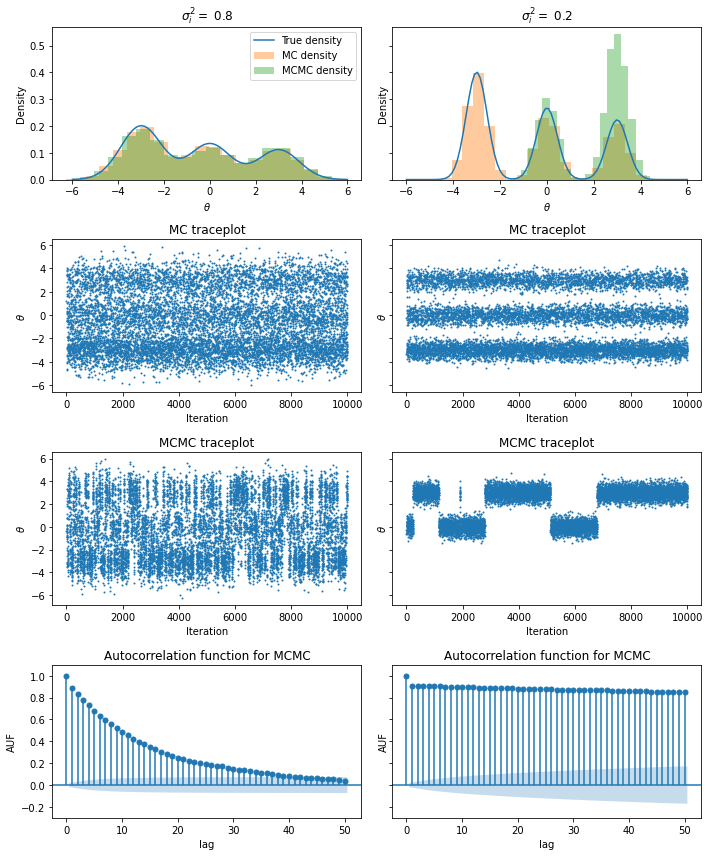

In [45]:
fig, ax = plt.subplots(4,2, figsize = (10,12), sharey = 'row')
# fig.suptitle('Density of prior distribution')

for i in range(2):
    ax[0,i].plot(x, true_density[i], label = 'True density')
    ax[0,i].hist(t_MC[i], bins = 20, density = True, label = 'MC density', alpha = 0.4)
    ax[0,i].hist(t_MCMC[i], bins = 20, density = True, label = 'MCMC density', alpha = 0.4)
    ax[0,i].set(title='$\sigma_i^2 = $ {}'.format(s2[i,0]), xlabel = '$\\theta$', ylabel='Density')
    ax[0,0].legend(loc='upper right')
    
    ax[1,i].scatter(np.arange(size), t_MC[i], s=1)
    ax[1,i].set(title = 'MC traceplot',xlabel = 'Iteration', ylabel='$\\theta$')
    
    ax[2,i].scatter(np.arange(size), t_MCMC[i], s=1)
    ax[2,i].set(title = 'MCMC traceplot', xlabel = 'Iteration', ylabel='$\\theta$')
    
    a =tsaplots.plot_acf(t_MCMC[i], lags=50, ax = ax[3,i], title = 'Autocorrelation function for MCMC')
    ax[3,i].set(xlabel = 'lag', ylabel='AUF', ylim = [-0.3, 1.1])
    
    
plt.tight_layout()

# plt.savefig('/nfs/scistore12/gaspgrp/emaksimo/courses/CompBayesStat/plots/Ex4_1_Fig2.png')